# Classification with tensorflow

## Classification vs Regression Models in tf

- Input shape: dimentions/shape of the image, vector etc

- Output shape: 1 for binary, or n for n categories

- Activation method: relu, softmax, sigmoid...

- Cross entropy is a more common loss function

## Creating data to view fit

In [1]:
from sklearn.datasets import make_circles # toy data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


# make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples, noise= .05, random_state = 42) 

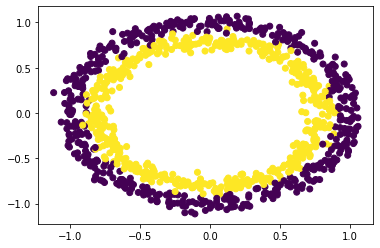

In [2]:
plt.scatter(X[:,0], X[:,1], c = y)

## Creating a Model

1. Create/import model
1. Compile model
1. Fit model
1. Evaluate
1. Tweak
1. Evaluate...

In [3]:
# data is now ready and in arrays/tensors
# create a lil model and see wassup
tf.random.set_seed(42)

model1 = tf.keras.Sequential([ # sequential is an api
             tf.keras.Input(shape = (1000,2)),
             tf.keras.layers.Dense(30, activation='relu'),
             tf.keras.layers.Dense(1, activation='sigmoid')                 
])
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model1.fit(X, y, epochs = 50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.7153 - accuracy: 0.5000
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.4630
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4720
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4780
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4720
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4450
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.4630
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.4740
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5000
Epoch 11/50
32/32 [

To visualize the model predictions we are to create a function that will:
-  take in a trained model, X, and y
- create a mesh grrid of different x values
- make predictions across the meshgrid
plot predictions as well as a line between zones where each unique class falls

In [4]:
def plot_descision_boundary(model, X, y):
  '''
  plots the decision boundary created by a model predicting on X
  '''
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack arrays together, creating the points

  # make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  # plot decision boundary
  plt.figure(figsize = (15, 10))
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = .7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap =plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [5]:
xmin, xmax = 0, 10
ymin, ymax = 0, 10
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 11),
                       np.linspace(ymin, ymax, 11))

In [6]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 4.,  0.],
       [ 5.,  0.],
       [ 6.,  0.],
       [ 7.,  0.],
       [ 8.,  0.],
       [ 9.,  0.],
       [10.,  0.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [ 0.,  2.],
       [ 1.,  2.],
       [ 2.,  2.],
       [ 3.,  2.],
       [ 4.,  2.],
       [ 5.,  2.],
       [ 6.,  2.],
       [ 7.,  2.],
       [ 8.,  2.],
       [ 9.,  2.],
       [10.,  2.],
       [ 0.,  3.],
       [ 1.,  3.],
       [ 2.,  3.],
       [ 3.,  3.],
       [ 4.,  3.],
       [ 5.,  3.],
       [ 6.,  3.],
       [ 7.,  3.],
       [ 8.,  3.],
       [ 9.,  3.],
       [10.,  3.],
       [ 0.,  4.],
       [ 1.,  4.],
       [ 2.,  4.],
       [ 3.,  4.],
       [ 4.,  4.],
       [ 5.,  4.],
       [ 6.,  4.],
       [ 7.,  4.],
       [ 8.,

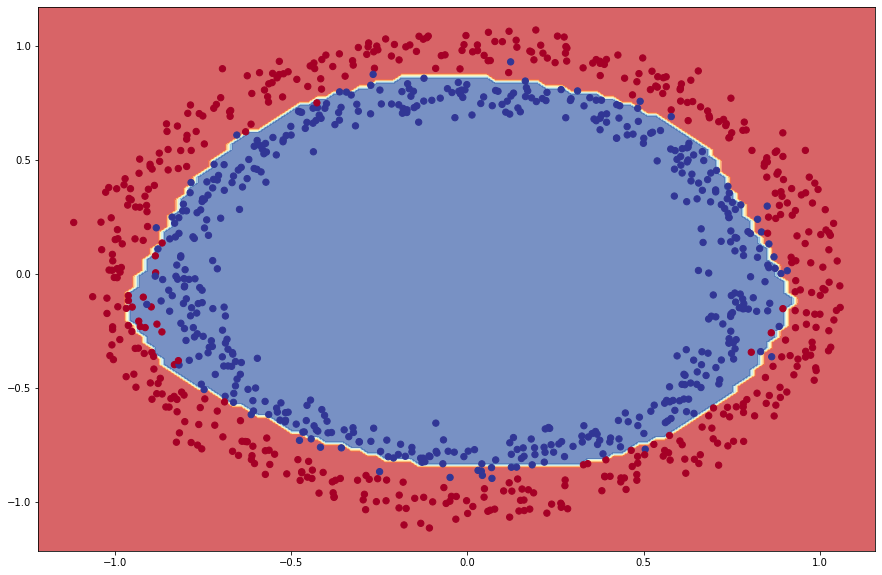

In [7]:
plot_descision_boundary(model = model1, X=X, y=y)

In [8]:
# lets try another
tf.random.set_seed(42)

model2 = tf.keras.Sequential([ # sequential is an api
             tf.keras.layers.Dense(50, activation='relu'),
             tf.keras.layers.Dense(50, activation = 'relu'),
             tf.keras.layers.Dense(1, activation='sigmoid')                 
])
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history1 = model2.fit(X, y, epochs = 30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5110
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5010
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5000
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5200
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6644 - accuracy: 0.5190
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.5780
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.8350
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7910
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.8670
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.9200
Epoch 11/30
32/32 [

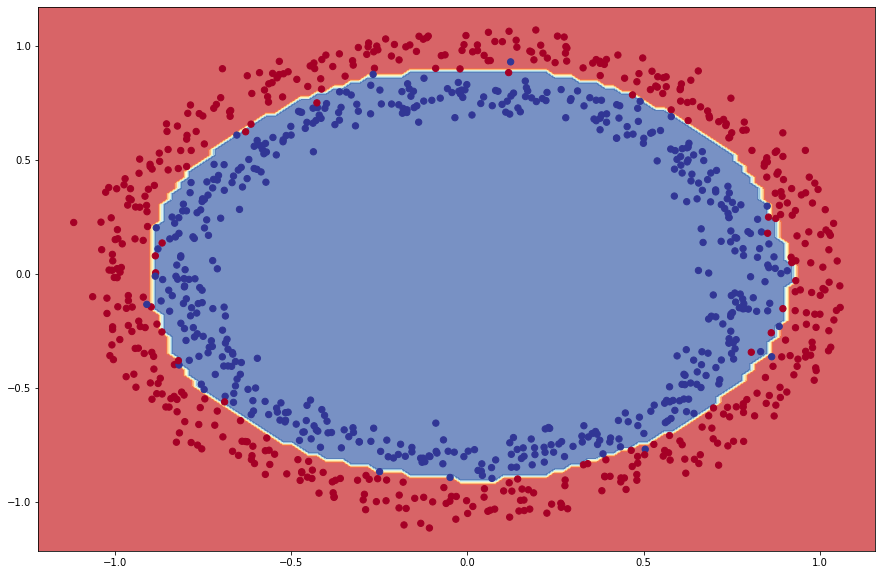

In [9]:
plot_descision_boundary(model2, X=X, y=y)
# Very Nice, accuracy = 100 (not using testing data )

## Hmm what did we actually do?

We have used non-linear neuron activations to successfully create a classification boundary between the two sets of data.

However! Given some dataset like this we could make whatever pattern is necessary. Images IRL are essentially very complex patterns like this  

## Comparing Activation Functions

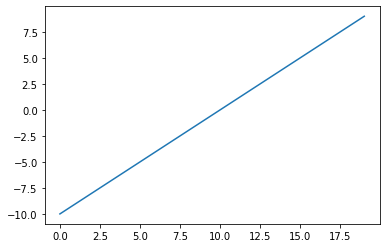

In [10]:
# create a toy tensor (similar to the data we pass through models)
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A)

In [11]:
def sigmoid(x):
  x = 1/(1 + tf.exp(-x))
  return x

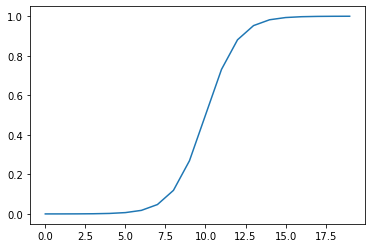

In [12]:
A_sig = sigmoid(A)
plt.plot(A_sig)

In [13]:
def relu(x):
  return tf.maximum(0, x)

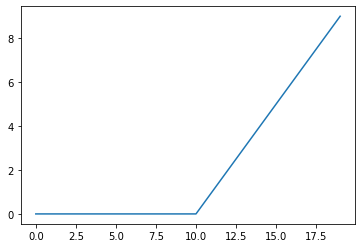

In [14]:
plt.plot(relu(A))

## Evaluate and Improve Classification Model

In [15]:
# make test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42 )

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 2), (750,), (250, 2), (250,))

In [17]:
tf.random.set_seed(34)
history_lr1 = model2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9827
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9800
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9773
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9787
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9800
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9800
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9787
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9840
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9827
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9800
Epoch 11/

Text(0.5, 1.0, 'Test')

<Figure size 1080x1080 with 0 Axes>

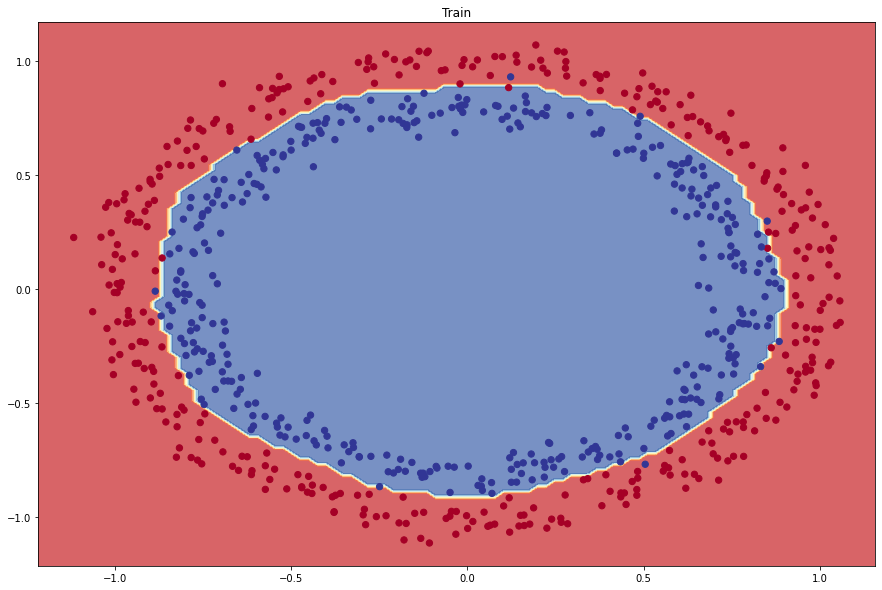

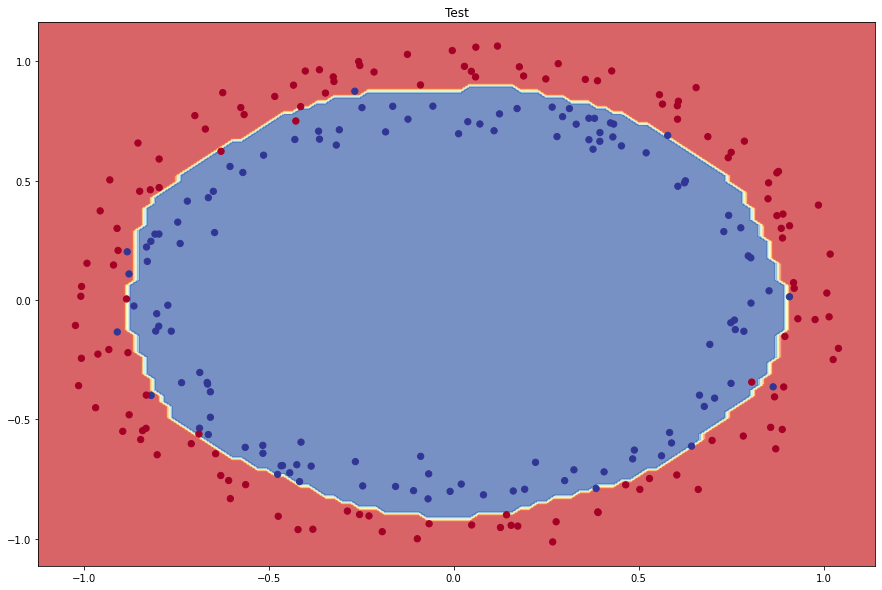

In [18]:
plt.figure(1, figsize = (15, 15))
plot_descision_boundary(model = model2, X = X_train, y = y_train)
plt.title('Train')
plt.figure(2, figsize = (15, 15))
#plt.subplot(2, 1, 2)

plot_descision_boundary(model = model2, X = X_test, y = y_test)
plt.title('Test')
#plt.show()

In [19]:
model2.evaluate(X_test, y_test) # accuracy of

8/8 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9480


[0.11712237447500229, 0.9480000138282776]

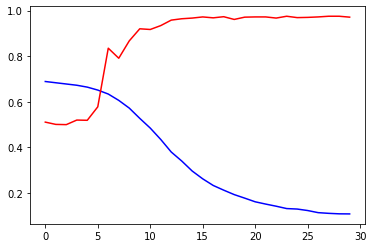

In [20]:
plt.plot(history1.history['loss'], c = 'b')
plt.plot(history1.history['accuracy'], c= 'r')
#plt.legend()

Text(0.5, 1.0, 'yo')

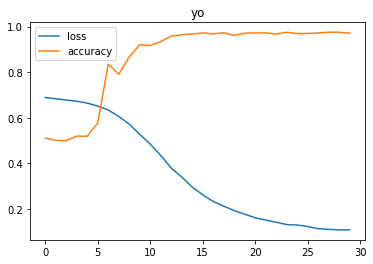

In [21]:
# better way
pd.DataFrame(history1.history).plot()
plt.title('yo')

## Finding the ideal Learning Rate

ie the lr where the loss decreases the most/most rapidly during training

- learning rate callback - extra piece of functionality you can add while a model is training

In [22]:
tf.random.set_seed(34)
# create model
model_3 = tf.keras.Sequential([
           tf.keras.layers.Dense(50, activation='relu'),
           tf.keras.layers.Dense(50, activation= 'relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')                    
])
# compile model
model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = 'Adam', 
                metrics = ['accuracy'])
# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# fit model

history = model_3.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6948 - accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5027
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5200
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5187
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5093
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.4960
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5000
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.4960
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.4960
Epoch 11/

Text(0.5, 0, 'epochs')

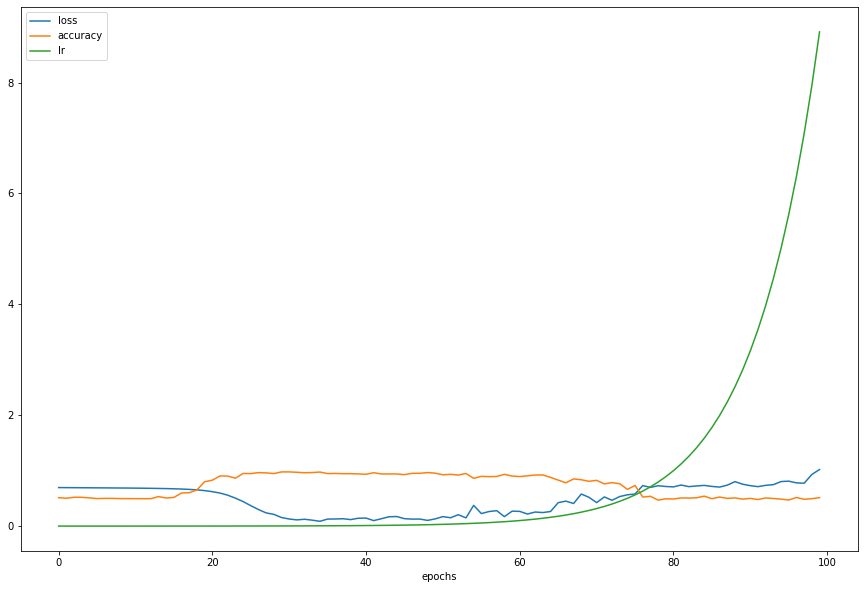

In [23]:
# check out the history
model3_historyDF = pd.DataFrame(history.history)
model3_historyDF.plot(figsize=(15, 10))
plt.xlabel('epochs')

Whats going on??

We want a learning rate where the loss decreases the fastest. By looking at the graph, the loss decreases the most at around the 25th-ish epoch

Text(0.5, 1.0, 'LR vs loss')

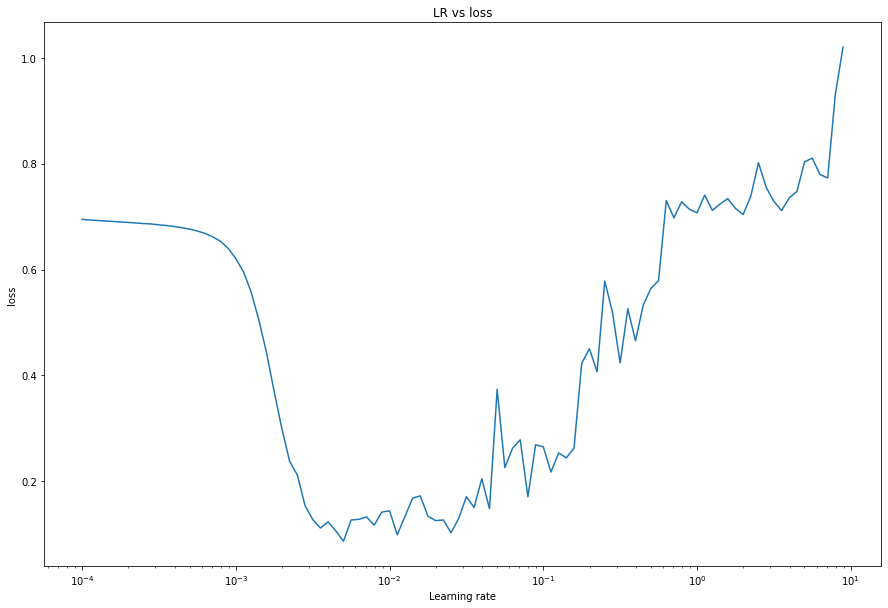

In [24]:
# plot learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # same values as the lambda function
plt.figure(figsize=(15, 10))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('LR vs loss')

 Example of typical learning rate values:

.1, .01, .001, .0001, ...

- ours is between $10^{-2}$ and $10^{-3}$

In [25]:
# lets see if our better lr is actually faster
tf.random.set_seed(34)
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(50, activation='relu'),
          tf.keras.layers.Dense(50, activation = 'relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')                   
])

model_4.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(lr = .025),
                metrics = ['accuracy'])

lr_25_history = model_4.fit(X_train, y_train, epochs = 100)



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6826 - accuracy: 0.5653
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7120
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8747
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9040
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9560
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9547
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.9000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9267
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9613
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9440
Epoch 11/

In [26]:
# just fo comparisons sake - getting loss history w/ training data using a lr of .001
# lets see if our better lr is actually faster
tf.random.set_seed(34)
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(50, activation='relu'),
          tf.keras.layers.Dense(50, activation = 'relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')                   
])

model_4.compile(loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_01_history = model_4.fit(X_train, y_train, epochs = 100)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.4867
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.4947
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.4947
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5920
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5773
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5507
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.7400
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.7933
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.8080
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.7507
Epoch 11/

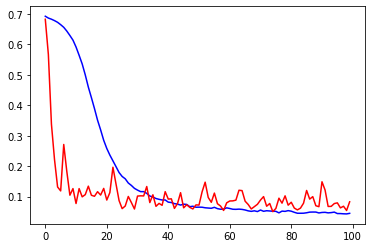

In [27]:
plt.plot(lr_01_history.history['loss'], c = 'b') # default
plt.plot(lr_25_history.history['loss'], c = 'r') # 'optimal' lr
# red decreased much more rapidly (although has odd spikes)

## More Classification Evaluation Metrics

In [28]:
import sklearn as sk
#tf.keras.metrics.Precision() #can be used in compile api
#tf.keras.metrics.Recall() # can be used in compile api
#sk.metrics.f1_score(y_train, np.ravel(model_4.predict(X_train))) 
#sk.metrics.confusion_matrix(y_train, np.ravel(model_4.predict(X_train))

# May need to set a classification threshold???

In [29]:
np.ravel(model_4.predict(X_train))[:10]


array([0.0022614 , 0.93282795, 0.01100776, 0.9960289 , 0.9951155 ,
       0.9934666 , 0.00451121, 0.998182  , 0.9999881 , 0.948419  ],
      dtype=float32)

In [30]:
# Check the accuracy of our model
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"model loss on the test set: {loss}") 
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9520
model loss on the test set: 0.1156032457947731
model accuracy on the test set: 95.20%


In [31]:

def prob_to_binary(model, threshold):
  '''
  convert probabilities to binary with a given threshold
  '''
  lst = []
  for i in range(0, len(model)):
    if model[i] > .5:
     i = 1
    else:
     i = 0
    lst.append(i)
  return lst


In [32]:
y_preds = model_4.predict(X_test)
y_preds_binary = prob_to_binary(y_preds, 0.5)


### Confusion Matrix

In [33]:
# Confusion Matrix

sk.metrics.confusion_matrix(y_test, y_preds_binary)

array([[125,   4],
       [  8, 113]])

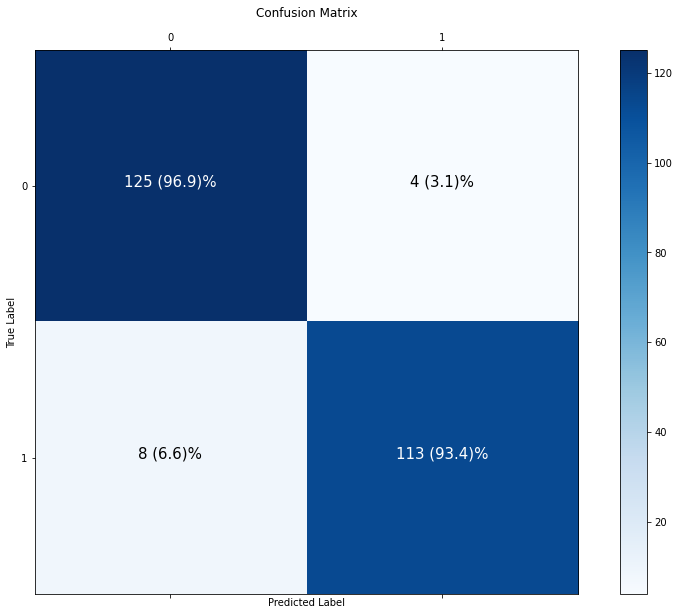

In [34]:
# make confusion matrix pretty
# going to use sk learn foh dis #remix # sick

import itertools

figsize = (15, 10)

cm = sk.metrics.confusion_matrix(y_test, y_preds_binary)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# una plota mas hermosa

fig, ax = plt.subplots(figsize = figsize)


# create a matrix plot
cax =  ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
# create classes

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes

ax.set(title= 'Confusion Matrix',
xlabel = 'Predicted Label',
ylabel = 'True Label',
xticks = np.arange(n_classes),
yticks = np.arange(n_classes), 
xticklabels=labels,
yticklabels=labels
)

# plot text on each cell

for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i,j]} ({cm_norm[i, j]*100:.1f})%', 
           horizontalalignment = 'center',
           color = 'white' if cm[i, j] > 50 else 'black', 
           size = 15)

# Working with a Larger Ex: Multi-Class Classification


 

## MNIST Fashion jawn

In [35]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

In [36]:
# the data is basically already preprocessed and stuff
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [37]:
# show the first training example
print(f'training sample: \n{train_data[0]}\n')
print(f'training label: {train_labels[0]}')

training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [38]:
# check the shape of a simngle example
train_data[0].shape, train_labels[0].shape
# 28x28 sample, scalar label

((28, 28), ())

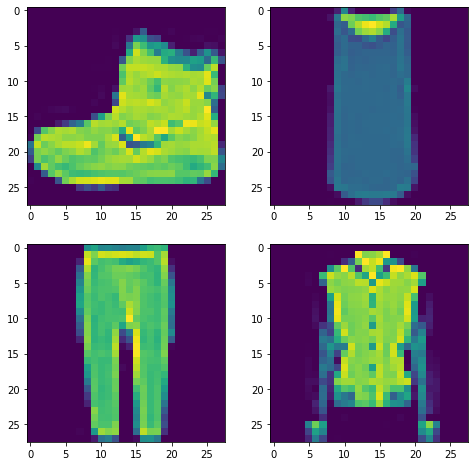

In [39]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(8,8))
axs[0,0].imshow(train_data[0])
axs[0,1].imshow(train_data[2])
axs[1,1].imshow(train_data[76])
axs[1,0].imshow(train_data[98])




In [40]:
# create a small listso we can index our training labels so they are human-readabele
class_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']
(class_names[train_labels[0]])

'boot'

Text(0.5, 1.0, 'trouser')

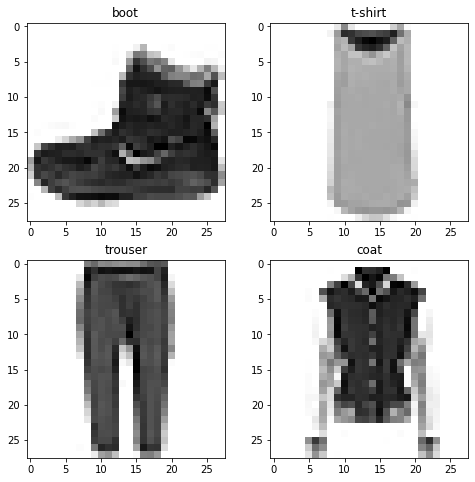

In [41]:
# plot an example image and its label
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(8,8))
axs[0,0].imshow(train_data[0], cmap = plt.cm.binary)
axs[0,0].set_title(class_names[train_labels[0]])
axs[0,1].imshow(train_data[2], cmap = plt.cm.binary)
axs[0,1].set_title(class_names[train_labels[2]])
axs[1,1].imshow(train_data[76], cmap = plt.cm.binary)
axs[1,1].set_title(class_names[train_labels[76]])
axs[1,0].imshow(train_data[98], cmap = plt.cm.binary)
axs[1,0].set_title(class_names[train_labels[98]])



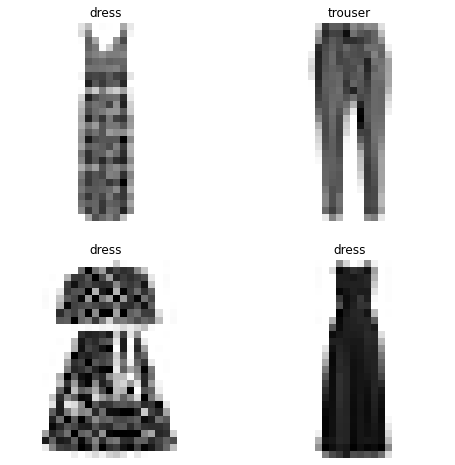

In [42]:
# same but with random samples
import random
plt.figure(figsize = (8,8))

for i in range(4):
  plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)




## Building the Muti-class model

### Structural Differences Between Binary and Multi-Class models

* 1 output per class
* softmax output activaction for multi-class, sigmoid for binary
* categorical cross entropy vs binary
  *  categorical cross entropy expects one-hot encoding, sparse categoricall cross entropy is used for just integers


In [43]:
# our data needs to be flattened from 28x28 to 1x784 (actually 0x784, wtvr)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28))])
flatten_model.output_shape

(None, 784)

In [44]:
# set seed
tf.random.set_seed(42)

# create model

model_mc = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation = 'relu'),
          tf.keras.layers.Dense(10, activation = 'softmax')                      
])


model_mc.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
non_norm_history = model_mc.fit(train_data, 
                                tf.one_hot(train_labels, depth = 10), 
                                epochs = 20,
                                validation_data = (test_data, tf.one_hot(test_labels, depth = 10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3565 - accuracy: 0.1642 - val_loss: 1.7498 - val_accuracy: 0.2383
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6234 - accuracy: 0.2990 - val_loss: 1.5334 - val_accuracy: 0.3311
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4639 - accuracy: 0.3705 - val_loss: 1.3378 - val_accuracy: 0.4237
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3299 - accuracy: 0.4306 - val_loss: 1.2807 - val_accuracy: 0.4495
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2959 - accuracy: 0.4442 - val_loss: 1.2825 - val_accuracy: 0.4420
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2787 - accuracy: 0.4467 - val_loss: 1.2738 - val_accuracy: 0.4442
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2613 - accuracy: 0.4511 - val_loss: 1.2480 - val_accuracy:

In [45]:
# Check model summary
model_mc.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [46]:
# normalize the data - 
train_data.min(), train_data.max()

(0, 255)

## Normalized Multi-class

 Neural Nets prefer data to be scaled to be between 0 and 1. In this case all the data in out train and test sets can be divided by the max to be normmalized

In [47]:
train_data_norm = train_data/(train_data.max())
test_data_norm = test_data/(train_data.max())

In [48]:
# Same NN but with normalized inputs

# set seed
tf.random.set_seed(42)

# create model

model_mc = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation = 'relu'),
          tf.keras.layers.Dense(10, activation = 'softmax')                      
])


model_mc.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
norm_history = model_mc.fit(train_data_norm, 
                                tf.one_hot(train_labels, depth = 10), 
                                epochs = 20,
                                validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7175 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.8237
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4600 - accuracy: 0.8387 - val_loss: 0.5208 - val_accuracy: 0.8253
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4300 - accuracy: 0.8481 - val_loss: 0.4625 - val_accuracy: 0.8366
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4134 - accuracy: 0.8551 - val_loss: 0.4497 - val_accuracy: 0.8394
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4029 - accuracy: 0.8580 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3948 - accuracy: 0.8602 - val_loss: 0.4585 - val_accuracy: 0.8366
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3883 - accuracy: 0.8632 - val_loss: 0.4507 - val_accuracy:

Accuracy is much better immediately after running the normalized model

(0.0, 2.5)

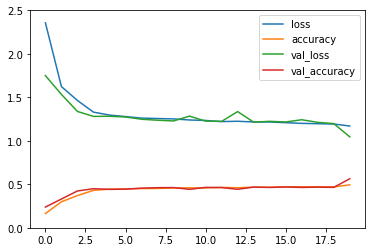

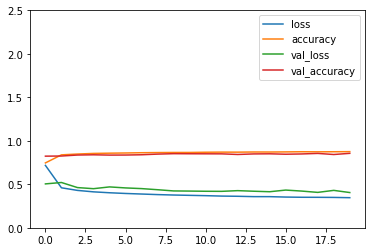

In [49]:
import pandas as pd
# plot non normalized data loss curves
plot1=pd.DataFrame(non_norm_history.history).plot()
plot1.set_ylim(0, 2.5)
# plot normalized
plot2=pd.DataFrame(norm_history.history).plot()
plot2.set_ylim(0, 2.5)

**Lesson**: The same model with only *slightly* different data can provide dramatically different results. When comparing models, its important to compare them on the same criteria. ie same architecture with different data or ame data with diff architecture

You want to know what change is making the difference in result

## Finding the ideal Learning Rate for a Multiclass model


In [50]:
# set seed
tf.random.set_seed(42)

# create model
model_mc3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),                     
          tf.keras.layers.Dense(40, activation='relu'),
          tf.keras.layers.Dense(40, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')                       
])
# compile
model_mc3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ['accuracy'])
# create Learning rate callback
lr_scheduler2 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_mc3_history = model_mc3.fit(train_data_norm, train_labels, 
                                  epochs = 30, 
                                  validation_data = (test_data_norm,test_labels),
                                  callbacks = lr_scheduler2)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5247 - accuracy: 0.8166 - val_loss: 0.4328 - val_accuracy: 0.8419
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8578 - val_loss: 0.4807 - val_accuracy: 0.8377
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3654 - accuracy: 0.8671 - val_loss: 0.4023 - val_accuracy: 0.8518
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3467 - accuracy: 0.8732 - val_loss: 0.4035 - val_accuracy: 0.8555
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3345 - accuracy: 0.8774 - val_loss: 0.3899 - val_accuracy: 0.8579
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3251 - accuracy: 0.8812 - val_loss: 0.3962 - val_accuracy: 0.8537
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3196 - accuracy: 0.8838 - val_loss: 0.3880 - val_accuracy:

Text(0, 0.5, 'loss')

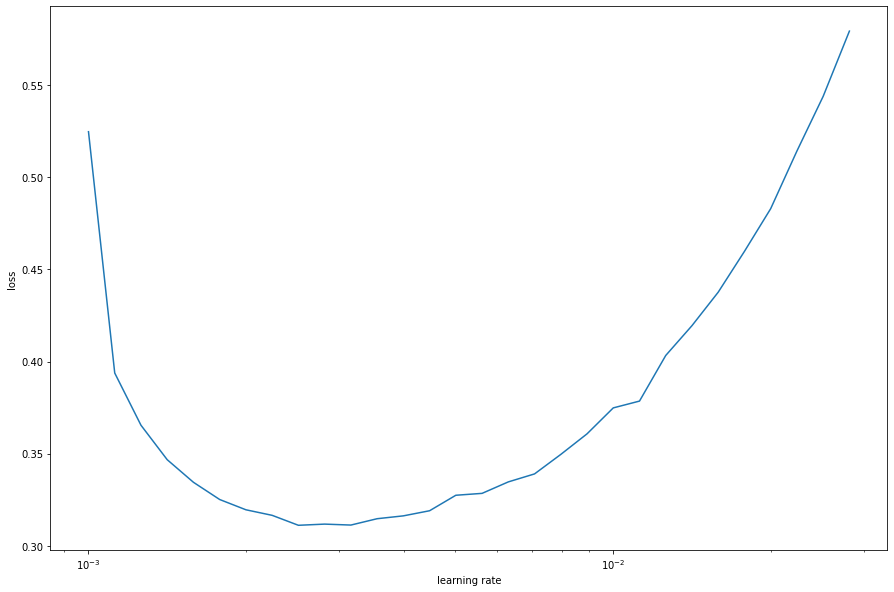

In [51]:
# plot LR decay curve
# import np and plt
lrs = 1e-3 * (10**(tf.range(30)/20))
plt.figure(figsize=(15, 10))
plt.semilogx(lrs, model_mc3_history.history["loss"])
plt.xlabel('learning rate')
plt.ylabel('loss') 
# could choose a lr of .0015 but we'll just stick with the default of .001

## Evaluating the MC model

options:
* evaluate performance using other metrix, like a confusion matrix
* assess some of its predictions (through visualization)
* move on and try to improve the results (longer training or change architecture)
* say ur chillin and just save & export the model

In [52]:
# create confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, textsize=10,figsize = (15,10)):

  cm = sk.metrics.confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # una plota mas hermosa

  fig, ax = plt.subplots(figsize = figsize)

  # create a matrix plot
  cax =  ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes

  ax.set(title= 'Confusion Matrix',
  xlabel = 'Predicted Label',
  ylabel = 'True Label',
  xticks = np.arange(n_classes),
  yticks = np.arange(n_classes), 
  xticklabels=labels,
  yticklabels=labels
  )

  # plot text on each cell
  threshold = (cm.max() + cm.min())/2
  for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i,j]} ({cm_norm[i, j]*100:.1f})%', 
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black', 
            size = textsize)

In [53]:
# make preds
y_probs = model_mc.predict(test_data_norm) # note we used the normalized data to train


In [54]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([7.0426158e-09, 1.0714891e-08, 1.7265504e-07, 1.9845449e-07,
        3.8811521e-08, 1.2535721e-01, 9.2157807e-06, 1.4413165e-01,
        8.2263061e-05, 7.3041916e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'boot')

In [55]:
# convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
accuracy = y_preds==test_labels
accuracy[:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True])

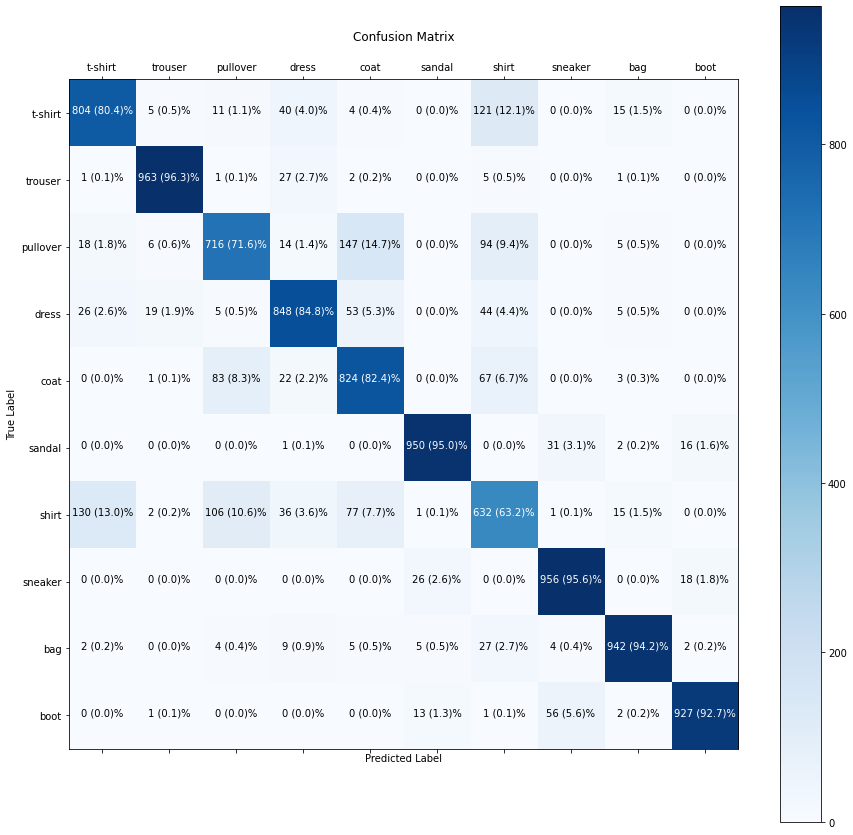

In [56]:

make_confusion_matrix(test_labels, y_preds, classes=class_names, textsize=10,figsize = (15, 15))

## Investigating Examples of Model Errors

In [62]:
import random

def plot_rand_image(model, images, true_labels, classes):
  '''
  picks a rand image, plots it, and labels it with the pred and true value
  '''
  # set up random integer
  i = random.randint(0, len(images))
  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color = color)

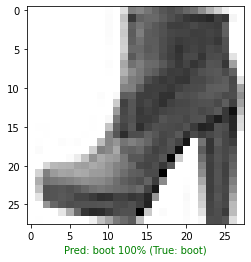

In [72]:
plot_rand_image(model = model_mc, images = test_data_norm, true_labels=test_labels,
                classes = class_names)

## What Patterns is our NN learning????

In [73]:
model_mc.layers[1]

In [74]:
weights, biases = model_mc.layers[1].get_weights()
weights, weights.shape

(array([[ 0.02861048,  0.49231774, -0.6461981 , ..., -0.44802824,
          0.17938308,  0.01048556],
        [-0.32982856, -0.6296206 , -0.51429737, ..., -0.62315226,
          0.7416752 ,  0.20723109],
        [-0.32683304, -0.4889338 , -0.917645  , ..., -0.91434664,
          0.76605934, -0.42290857],
        ...,
        [ 0.08513062, -0.7228847 , -0.15577519, ...,  0.1039302 ,
          0.21827371, -0.05047444],
        [-0.07292338, -0.64755213, -0.55015254, ...,  0.76369214,
         -0.05744345,  0.0318126 ],
        [ 0.22518682, -0.5509408 , -0.08413997, ...,  0.00401967,
          0.16752778, -0.38827077]], dtype=float32), (784, 10))